<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Casey\AppData\Local\Temp\ipykernel_13712\3155564418.py:6: SyntaxWarning: invalid escape sequence '\D'
  path='\\temp\DC2\\'


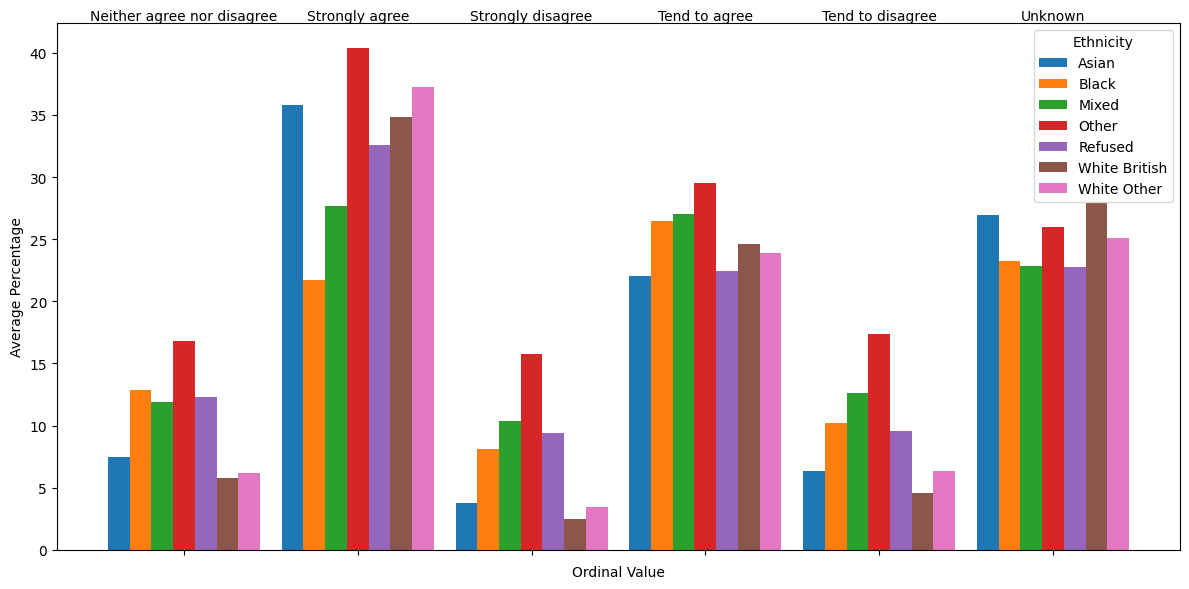

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path='\\temp\DC2\\'

df = pd.read_csv(path+'sas_census_ss2.csv')
df['A120'] = df['A120'].replace('', pd.NA).fillna('Unknown')

# Step 2: Create table t1A
t1A = (df.groupby(['Borough', 'ReNQ147'])
       .size()
       .reset_index(name='count')
       .sort_values(by=['Borough', 'count'], ascending=[True, False]))

t1B = (df.groupby(['Borough', 'ReNQ147', 'A120'])
       .size()
       .reset_index(name='count')
       .sort_values(by=['Borough', 'ReNQ147', 'count'], ascending=[True, True, False]))

t1 = pd.merge(t1B, t1A[['Borough', 'ReNQ147', 'count']], 
              on=['Borough', 'ReNQ147'], 
              suffixes=('', '_totcount'))

t1['pct'] = round(100 * t1['count'] / t1['count_totcount'])

t2 = t1.sort_values(by=['Borough', 'A120', 'pct'], ascending=[True, True, False])



grouped_df = t2.groupby(['ReNQ147', 'A120'])['pct'].mean().reset_index()
grouped_df.columns = ['Ethnicity', 'Ordinal Value', 'Average Percentage']


ordinal_values = grouped_df['Ordinal Value'].unique()
ethnicities = grouped_df['Ethnicity'].unique()


bar_width = 0.2
x = np.arange(len(ordinal_values)) * (len(ethnicities) + 1) * bar_width


fig, ax = plt.subplots(figsize=(12, 6))


for i, ethnicity in enumerate(ethnicities):
    subset = grouped_df[grouped_df['Ethnicity'] == ethnicity]
    ax.bar(x + i * bar_width, subset['Average Percentage'], bar_width, label=ethnicity)

# Add labels and title
ax.set_xlabel('Ordinal Value')
ax.set_ylabel('Average Percentage')
#ax.set_title('Average Percentage by Ethnicity and Ordinal Value')


ax.set_xticks(x + bar_width * (len(ethnicities) - 1) / 2)
ax.set_xticklabels([])


for i, value in enumerate(ordinal_values):
    ax.text(x[i] + bar_width * (len(ethnicities) - 1) / 2, ax.get_ylim()[1], value, ha='center', va='bottom')

ax.legend(title='Ethnicity')

# Show the plot
plt.tight_layout()
plt.show()